In [3]:
import Pendulum
import numpy as np
import matplotlib.pyplot as plt
#from maths_utils import evaluate, tes_stationarity, RMSE
#from methods import ANN, var_multi

## Ejemplo de uso de red neuronal

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:
# creamos la serie temporal simulada
np.random.seed(42)
n = 1000
t = np.arange(n)
consumo = np.sin(0.02*t) + 0.5* np.random.randn(n)

# Convertir a un DataFrame para facilitar la manipulacion
df = pd.DataFrame(consumo, columns = ['Consumo'])

In [5]:
# Preprocesamos los datos
# Escalamos los datos 
scaler = MinMaxScaler(feature_range = (0, 1))
df_scaled = scaler.fit_transform(df)

# Creamos las secuencias para la red LSTM
def create_sequences(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i: i +n_steps])
        y.append(data[i + n_steps])
    return np.array(x), np.array(y)

n_steps = 10 # Numero de pasos de la secuencia
x, y = create_sequences(df_scaled, n_steps)

In [14]:
df_scaled.shape

(1000, 1)

In [6]:
# Definimos el modelo LSTM
model = Sequential()
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mse')

# Reshape de los datos para la LSTM [samples, time steps, features]
x = x.reshape((x.shape[0], x.shape[1], 1))

# Entrenar el modelo
model.fit(x, y, epochs = 200, verbose = 0)

In [24]:
x[:5, 2], x.shape

(array([[0.62788238],
        [0.72875986],
        [0.53949205],
        [0.54388448],
        [0.74812212]]),
 (990, 10, 1))

In [35]:
# Hacemos las predicciones
# Usar los últimos n_steps puntos para predecir el siguiente valor
x_input = df_scaled[-n_steps:].reshape((1, n_steps, 1))
predicted = model.predict(x_input, verbose=0)

# Invertir la escala para obtener el valor original
predicted = predicted.reshape((1, n_steps))
predicted_value = scaler.inverse_transform(predicted)
print(f'Predicción del siguiente valor de consumo: {predicted_value[0][0]:.4f}')

Predicción del siguiente valor de consumo: 0.6302


In [34]:
predicted[0, :, :]

array([[0.6865952 ],
       [0.5255082 ],
       [0.6569143 ],
       [0.62702787],
       [0.6054225 ],
       [0.6589992 ],
       [0.8107656 ],
       [0.7284566 ],
       [0.6421054 ],
       [0.72608995]], dtype=float32)

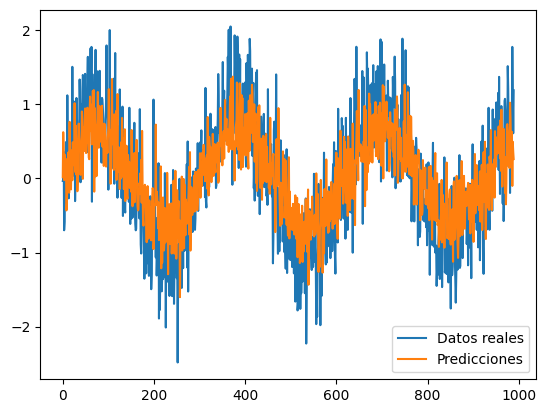

In [54]:
# Visualizar los resultados 
# Crear predicciones sobre todo el conjunto de datos
train_predict = model.predict(x, verbose = 0)
train_predict = train_predict.reshape((train_predict.shape[0], n_steps))
train_predict = scaler.inverse_transform(train_predict)
actual_data = scaler.inverse_transform(y.reshape(-1, 1))

# Graficar los resultados
plt.plot(actual_data, label = 'Datos reales')
plt.plot(train_predict[:, 5], label = 'Predicciones')
#plt.plot(train_predict.reshape((train_predict.shape[0]*train_predict.shape[1])), label = 'Predicciones')
plt.legend()
plt.show()

In [50]:
actual_data.shape, train_predict.shape

((990, 1), (990, 10))

## Ejemplo de uso de Prophet

19:00:45 - cmdstanpy - INFO - Chain [1] start processing
19:00:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\Juanjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\Juanjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


            ds        yhat  yhat_lower  yhat_upper
125 2023-05-06  169.800116  155.469608  184.529931
126 2023-05-07  175.072904  158.615591  190.138463
127 2023-05-08  180.033027  165.347922  195.131227
128 2023-05-09  179.747114  164.516387  194.605015
129 2023-05-10  181.696421  167.149985  196.401085


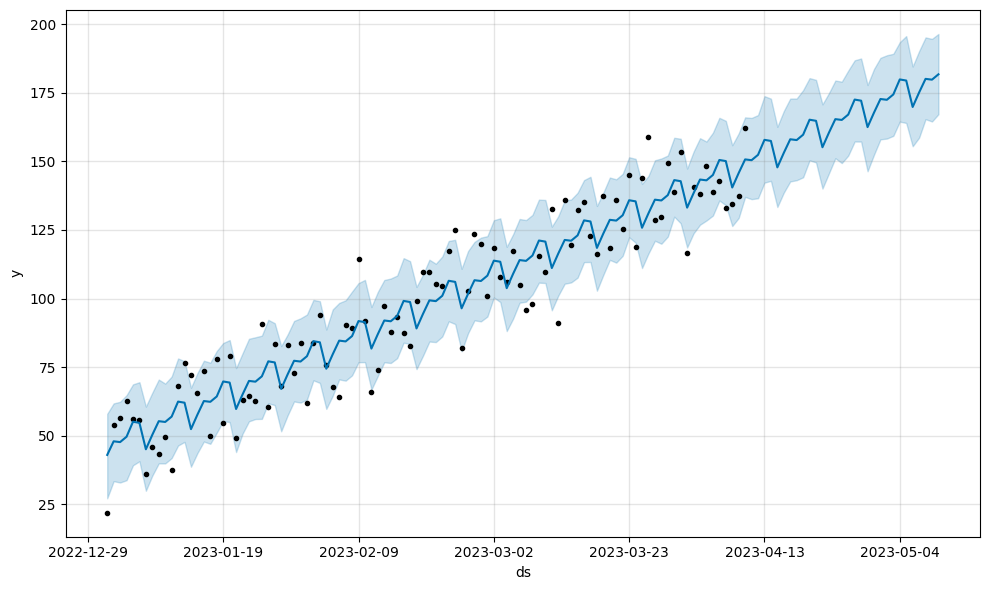

In [60]:
import pandas as pd
from prophet import Prophet

# Creamos un DataFrame con los datos de la serie temporal
# Supongamos que tenemos datos de ventas diarias

data = {

    'ds': pd.date_range(start = '2023-01-01', periods = 100, freq = 'D'), 
    'y': [20 + i + (i%5)*5 + 40*np.random.rand() for i in range(100)]
}

df = pd.DataFrame(data)

# Creamos un modelo Prophet
model = Prophet()

# Ajustamos el modelo a los datos
model.fit(df)

# Creamos un DataFrame para las futuras predicciones (por ejemplo, predecir 30 días en el futuro)
future = model.make_future_dataframe(periods = 30)

# Realizamos las predicciones
forecast = model.predict(future)

# Mostramos las predicciones
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Opcional: Graficamos las predicciones
import matplotlib.pyplot as plt

model.plot(forecast)
plt.show()



C:\Users\Juanjo\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


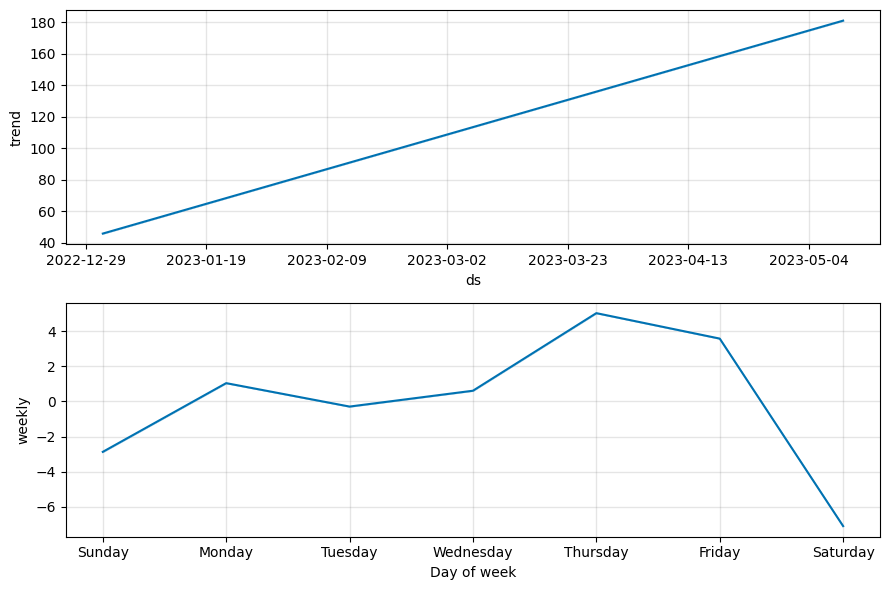

In [61]:
# También puedes graficar los componentes de la predicción (tendencia, estacionalidad)
model.plot_components(forecast)
plt.show()